In [34]:
import random
import itertools
import matplotlib.pyplot as plt

S = 0
I = 1
R = 2

# THESE LATER
V = 3 # Vaccinated
Q = 4 # Quarantined

# Major based sheduling?
# Should we model parties?

class Location:
    def __init__(self, infection_rate):
        self.infection_rate = infection_rate
        self.bucket = []
        
class Person:
    def __init__(self, state=S):
        self.state = state
        self.recovery_prob = 0.01

def gen_locations(num_locations, num_people):
    locs = []

    for i in range(num_locations):
        infection_probability = random.uniform(1e-3, 5e-3)
        loc = Location(infection_probability)
        locs.append(loc)
        
    for j in range(24):
        people = set(range(num_people))
        for loc in locs:
            if j < 8 or j > 19:
                loc.bucket.append([])
            else:
                samp = random.sample(list(people), k = num_people // num_locations)
                loc.bucket.append(samp)
                people -= set(samp)
    return locs

def gen_people(num_people):
    ppl = []
    for _ in range(num_people):
        status = random.choices([I, S], weights=[1,7])[0]
        person = Person(status)
        ppl.append(person)
    return ppl

def people_with_state(bucket, people, state):
    return filter(lambda id: people[id].state == state, bucket)

def infection_pairs(bucket, people):
    infected    = people_with_state(bucket, people, I)
    susceptible = people_with_state(bucket, people, S)
    return itertools.product(infected, susceptible)

def find_new_infections(location, people, time):
    new_infections = []
    for p1, p2 in infection_pairs(location.bucket[time], people):
        if random.random() < location.infection_rate and p2 not in new_infections:
            new_infections.append(p2)
    return new_infections

def count_state(people, state):
    return sum(person.state == state for person in people)

def simulate(locations, people, num_days):
    infected = [count_state(people, I)]
    recovered = [count_state(people, R)]
    susceptible = [count_state(people, S)]
    for day in range(num_days):
        for time in range(24):
            # Set Infections
            for location in locations:
                for person_id in find_new_infections(location, people, time):
                    people[person_id].state = I
            # Handle Recovery
            for person in people:
                if person.state == I and random.random() < person.recovery_prob:
                    person.state = R
        # Get Counts
        infected.append(count_state(people, I))
        recovered.append(count_state(people, R))
        susceptible.append(count_state(people, S))
    return infected, recovered, susceptible

Text(0.5, 0, 'Days')

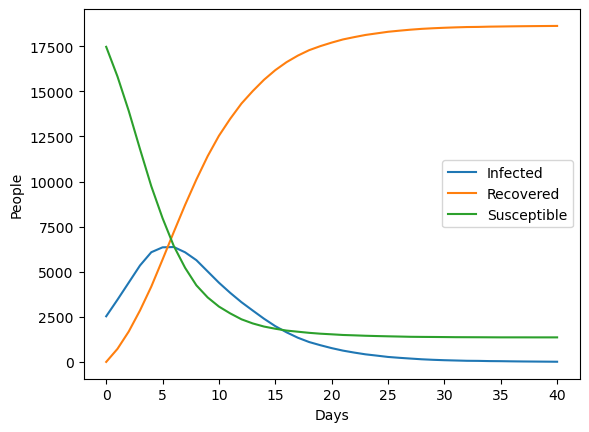

In [35]:
# In our initial model people got infected really fast but recovered really fast

NUM_LOCS = 1000
NUM_PEOPLE = 20_000
NUM_DAYS = 40

locations = gen_locations(NUM_LOCS, NUM_PEOPLE)

ppl = gen_people(NUM_PEOPLE)
    
i, r, s = simulate(locations, ppl, NUM_DAYS)

fig, ax = plt.subplots()
ax.plot(i)
ax.plot(r)
ax.plot(s)

ax.legend(["Infected", "Recovered", "Susceptible"])
ax.set_ylabel("People")
ax.set_xlabel("Days")